
# Productivity Prediction of Garment Employees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Problem Definition

In this file, We are trying to solve regression problem: predict productivity that was delivered by the workers

# Data Collection

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

In [2]:
# link: https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees
url = 'https://github.com/phanluonghuy/test/raw/main/garments_worker_productivity.csv'
df = pd.read_csv(url)

# Data Visualization

In [3]:
df.shape

(1197, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


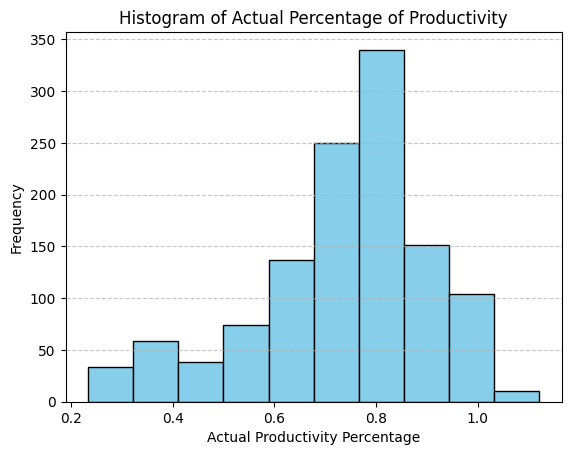

In [7]:
# Plotting
targets = df.iloc[:, -1]
plt.hist(targets, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Actual Productivity Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Percentage of Productivity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data Preprocessing

## Data Cleaning

In [8]:
# Check for missing values
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
# Option 1: Imputation
# Replace missing values in 'WIP' with the median of the column
median_wip = df['wip'].median()
df['wip'].fillna(median_wip, inplace=True)

# Option 2: Drop rows with missing values
# df.dropna(inplace=True) 

# Option 3: Domain-specific knowledge
# If missing 'WIP' indicates it's not applicable, you may replace missing values with 0 or a special category.
# df['wip'].fillna(0, inplace=True)

C:\Users\ToanGTV\AppData\Local\Temp\ipykernel_23744\1520531422.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(median_wip, inplace=True)


In [10]:
df.duplicated().sum()
# df.drop_duplicates()

0

In [11]:
# Drop column
df = df.drop(columns=['date', 'team'])
df

,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


## Data Transformation

In [12]:
columns = df.columns
types = df.dtypes

le = LabelEncoder()
for column_name, column_type in types.items():
    if column_type == 'object':
        df[column_name] = df[column_name].str.strip() 
        df[column_name] = le.fit_transform(df[column_name])


# min_max_scaler = MinMaxScaler()
# standard_scaler = StandardScaler()

# # List of numerical columns to be scaled
# numerical_columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']

# # Apply MinMaxScaler to numerical columns
# df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# # Apply StandardScaler to numerical columns
# df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])
        
# df = pd.get_dummies(df)

df

,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,3,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,3,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,5,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,5,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,5,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


# Feature Engineering

## Feature Selection

In [13]:
data = df.values
X = data[:,:-1]
y = data[:,-1] 
print(X.shape)
print(y.shape)

(1197, 12)
(1197,)


## Standardization

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[-1.15168784  0.85572897  0.27151595  0.71913683  1.01455214 -0.01319746
  0.75058892  0.37341414 -0.05747269 -0.11300466 -0.3516175   1.0992288 ]


# Splitting the Data

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (957, 12)
Shape of y_train: (957,)
Shape of X_val: (120, 12)
Shape of y_val: (120,)
Shape of X_test: (120, 12)
Shape of y_test: (120,)


# Model Selection

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
}


# Model Training

In [17]:
# training + evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model: {name}")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("-"*50)

Model: Linear Regression
Mean Absolute Error: 0.11573095284743949
Mean Squared Error: 0.025046220310570917
--------------------------------------------------
Model: Decision Tree
Mean Absolute Error: 0.07551734163194447
Mean Squared Error: 0.02038065483132797
--------------------------------------------------
Model: KNN
Mean Absolute Error: 0.09922106353333332
Mean Squared Error: 0.018746678445751494
--------------------------------------------------


# Hyperparameter Tuning

In [18]:
params = {
    "Linear Regression": {},
    "Decision Tree": {"max_depth": [None, 5, 10, 15], "min_samples_split": [2, 5, 10]},
    "KNN": {"n_neighbors": [3, 5, 7, 9]}
}

# Model Evaluation

In [19]:
# # training + evaluation after tunning
from sklearn.model_selection import GridSearchCV

for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], scoring='neg_mean_absolute_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("-"*50)

Model: Linear Regression
Best Parameters: {}
Mean Absolute Error: 0.11573095284743949
Mean Squared Error: 0.025046220310570917
--------------------------------------------------
Model: Decision Tree
Best Parameters: {'max_depth': 15, 'min_samples_split': 10}
Mean Absolute Error: 0.07576068844346008
Mean Squared Error: 0.01690943095128038
--------------------------------------------------
Model: KNN
Best Parameters: {'n_neighbors': 5}
Mean Absolute Error: 0.09922106353333332
Mean Squared Error: 0.018746678445751494
--------------------------------------------------


#  Improve the accuracy of the models

In [20]:
# Define separate pipelines for each model type
pipelines = {
    'Linear Regression': Pipeline([
        ('imputer', SimpleImputer()),  # Handle missing values
        ('scaler', StandardScaler()),  # Standardize numerical features
        ('model', LinearRegression())  # Linear Regression model
    ]),
    'Decision Tree': Pipeline([
        ('imputer', SimpleImputer()), 
        ('scaler', StandardScaler()),  
        ('model', DecisionTreeRegressor())  
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer()),  
        ('scaler', StandardScaler()),  
        ('model', RandomForestRegressor())  
    ]),
    'Gradient Boosting': Pipeline([
        ('imputer', SimpleImputer()), 
        ('scaler', StandardScaler()), 
        ('model', GradientBoostingRegressor())  
    ])
}

# Define hyperparameter grids for models with tunable parameters
param_grids = {
    'Decision Tree': {
        'model__max_depth': [None, 5, 10, 15],
        'model__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [None, 5, 10, 15],
        'model__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 150],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}

# Perform randomized search for hyperparameter tuning for models with tunable parameters
best_models = {}
for name, pipeline in pipelines.items():
    if name != 'Linear Regression':
        param_grid = param_grids.get(name, {})
        grid_search = RandomizedSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5, n_iter=10)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_

linear_regression_pipeline = pipelines['Linear Regression']
linear_regression_pipeline.fit(X_train, y_train)
best_models['Linear Regression'] = linear_regression_pipeline

# Evaluate the best models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model: {name}")
    if name != 'Linear Regression':
        print("Best Parameters:", model.named_steps['model'].get_params())
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("-"*50)


Model: Decision Tree
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Mean Absolute Error: 0.07621679456068234
Mean Squared Error: 0.016945034503235038
--------------------------------------------------
Model: Random Forest
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Mean Absolute Error: 0.06416285106760082
Mean Squared Error: 0.011676546254233667
---------------------